Datos generados para Pollería
Epoch 1/50


C:\Users\juanito\AppData\Local\Temp\ipykernel_22492\3994408351.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  meses = pd.date_range(start=start, end=end, freq='M')
c:\Users\juanito\anaconda3\envs\juanito\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24246296248320.0000
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 316.9108 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5213 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5100 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5055
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5158 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5092
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5105 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5048 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5114
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5047 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5115
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5154
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5147 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4947  
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━

C:\Users\juanito\AppData\Local\Temp\ipykernel_22492\3994408351.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  meses_2025 = pd.date_range(start='2025-01-01', end='2025-12-31', freq='M')


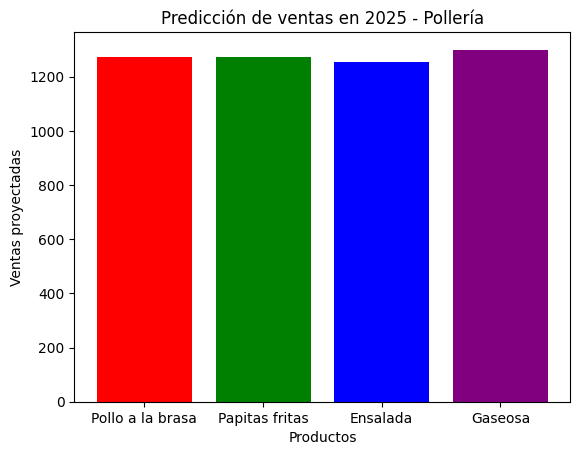

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(42)
def generar_datos_ventas(nombre_empresa, productos, start, end):
 meses = pd.date_range(start=start, end=end, freq='M')
 datos_ventas = pd.DataFrame({
       'Meses': meses,
 **{producto: np.random.randint(500, 2000, size=len(meses)) for producto in productos}
 })
 datos_ventas.to_csv(f'{nombre_empresa}.csv')
 print(f'Datos generados para {nombre_empresa}')
empresa = 'Pollería'
productos = ['Pollo a la brasa', 'Papitas fritas', 'Ensalada', 'Gaseosa']
generar_datos_ventas(empresa, productos, '2020-01-01', '2024-09-30')
datos_polleria = pd.read_csv('Pollería.csv')
datos_polleria['Meses'] = pd.to_datetime(datos_polleria['Meses'])
X_polleria = datos_polleria['Meses'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
Y_polleria = datos_polleria[productos].values
scaler = MinMaxScaler(feature_range=(-1, 1))
Y_polleria_scaled = scaler.fit_transform(Y_polleria)
modelo_polleria = Sequential()
modelo_polleria.add(Dense(32, activation='relu', input_shape=(1,)))
modelo_polleria.add(Dense(32, activation='relu'))
modelo_polleria.add(Dense(4))
modelo_polleria.compile(optimizer='sgd', loss='mean_absolute_error')
modelo_polleria.fit(X_polleria, Y_polleria_scaled, epochs=50, verbose=1)
meses_2025 = pd.date_range(start='2025-01-01', end='2025-12-31', freq='M')
X_2025 = np.arange(len(X_polleria), len(X_polleria) + len(meses_2025)).reshape(-1, 1)
predicciones_polleria_scaled = modelo_polleria.predict(X_2025)
predicciones_polleria = scaler.inverse_transform(predicciones_polleria_scaled)
ventas_2025 = predicciones_polleria[10]
plt.bar(productos, ventas_2025, color=['red', 'green', 'blue', 'purple'])
plt.title('Predicción de ventas en 2025 - Pollería')
plt.ylabel('Ventas proyectadas')
plt.xlabel('Productos')
plt.show()
